In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# Example documents
documents = [
    "The economy is working better than ever.",
    "The president addressed the nation on the economy.",
    "SpaceX launched a new rocket into orbit.",
    "NASA is planning a mission to Mars.",
    "The stock market reached an all-time high.",
    "Astronauts train for space missions at NASA."
]

In [4]:
# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [5]:
features = vectorizer.get_feature_names_out()
features

array(['addressed', 'astronauts', 'better', 'economy', 'high', 'launched',
       'market', 'mars', 'mission', 'missions', 'nasa', 'nation', 'new',
       'orbit', 'planning', 'president', 'reached', 'rocket', 'space',
       'spacex', 'stock', 'time', 'train', 'working'], dtype=object)

In [6]:
# 3. Convert to DataFrame for inspection
example_dtm = pd.DataFrame(X.toarray(), columns=features)
example_dtm.index = [f"Doc {i+1}" for i in range(len(documents))]
display(example_dtm)

,addressed,astronauts,better,economy,high,launched,market,mars,mission,missions,...,planning,president,reached,rocket,space,spacex,stock,time,train,working
Doc 1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Doc 2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Doc 3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
Doc 4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
Doc 5,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
Doc 6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [7]:
# 4. Visualize word frequencies
word_freq_example = pd.Series(np.asarray(X.sum(axis=0)).flatten(), index=features)
top_words_example = word_freq_example.sort_values(ascending=False)

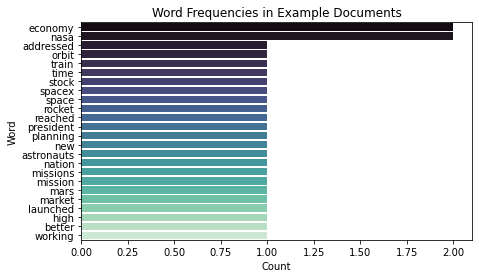

In [8]:
plt.figure(figsize=(7, 4))
sns.barplot(x=top_words_example.values, y=top_words_example.index, palette="mako")
plt.title("Word Frequencies in Example Documents")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [11]:
# Fit LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display topics
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, vectorizer.get_feature_names_out(), 5)

Topic #1:
economy new orbit launched spacex
Topic #2:
nasa time stock reached high
